In [7]:
!ls /orangedata/Images2024/Zach/MouseBrainAtlas/

MMSF01_6.3.A_5.3.B_4.3.C_3.3.F_2.3.E_1.3.D_2024Apr15
MMSM01_1.1.A_2.1.B_3.1.C_4.1.F_5.1.E_6.1.D_2024Apr15
WTF01_1.2.A_2.2.B_3.2.C_4.2.D_5.2.E_6.2.F_2024Apr08
WTM01_3.2.A_2.2.B_1.2.C_6.2.D_5.2.E_4.2.F_2024Apr08
WTM02_2.2.A_1.1.B_2.1.D_3.2.E_2024Apr01
WTM02_3.1.A_2.3.B_3.3.D_1.2.E_2024Apr01


{'WellA-Section1': ''}
{'WellA-Section2': ''}
{'WellA-Section3': ''}
{'WellA-Section4': ''}
{'WellB-Section1': ''}
{'WellB-Section2': ''}
{'WellB-Section3': ''}
{'WellB-Section4': ''}
{'WellC-Section1': ''}
{'WellC-Section2': ''}
{'WellC-Section3': ''}
{'WellC-Section4': ''}
{'WellD-Section1': ''}
{'WellD-Section2': ''}
{'WellD-Section3': ''}
{'WellD-Section4': ''}
{'WellE-Section1': ''}
{'WellE-Section2': ''}
{'WellE-Section3': ''}
{'WellE-Section4': ''}
{'WellF-Section1': ''}
{'WellF-Section2': ''}
{'WellF-Section3': ''}
{'WellF-Section4': ''}


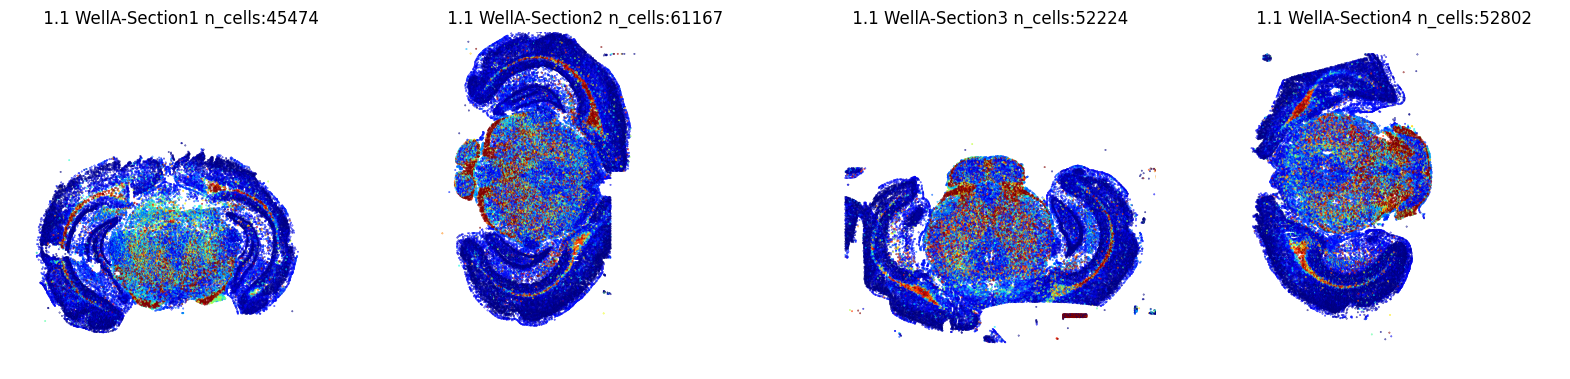

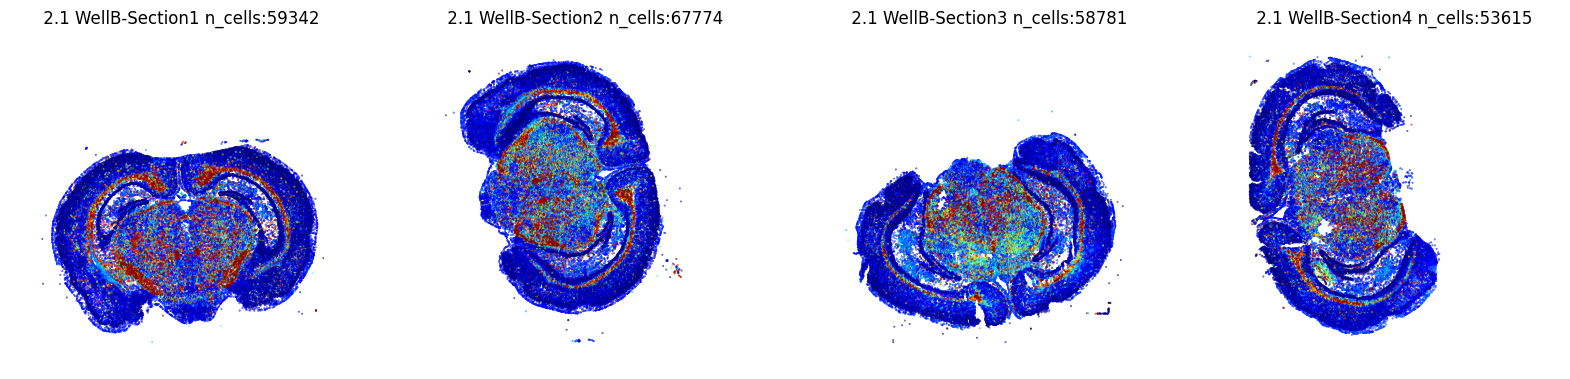

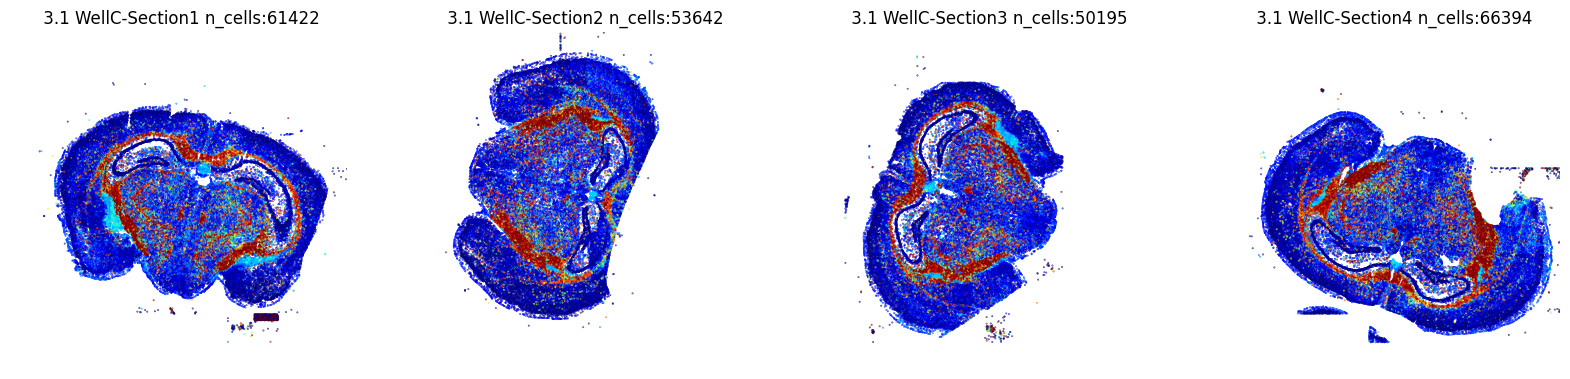

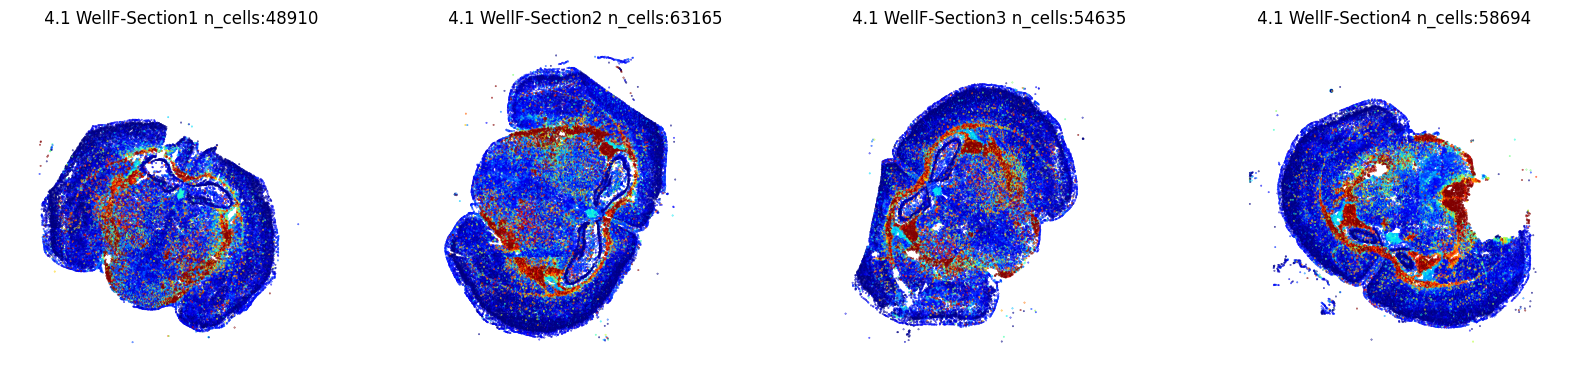

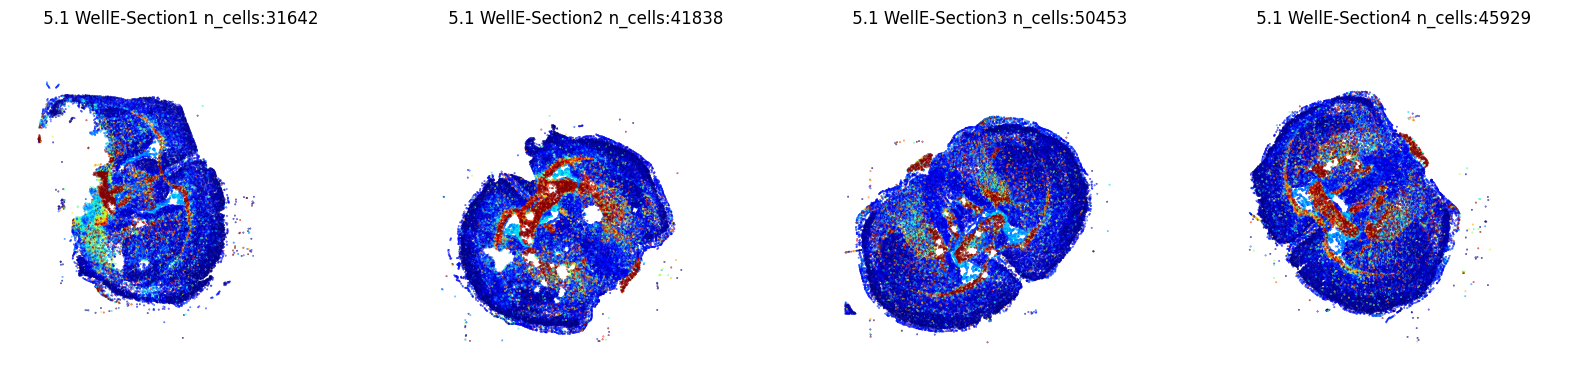

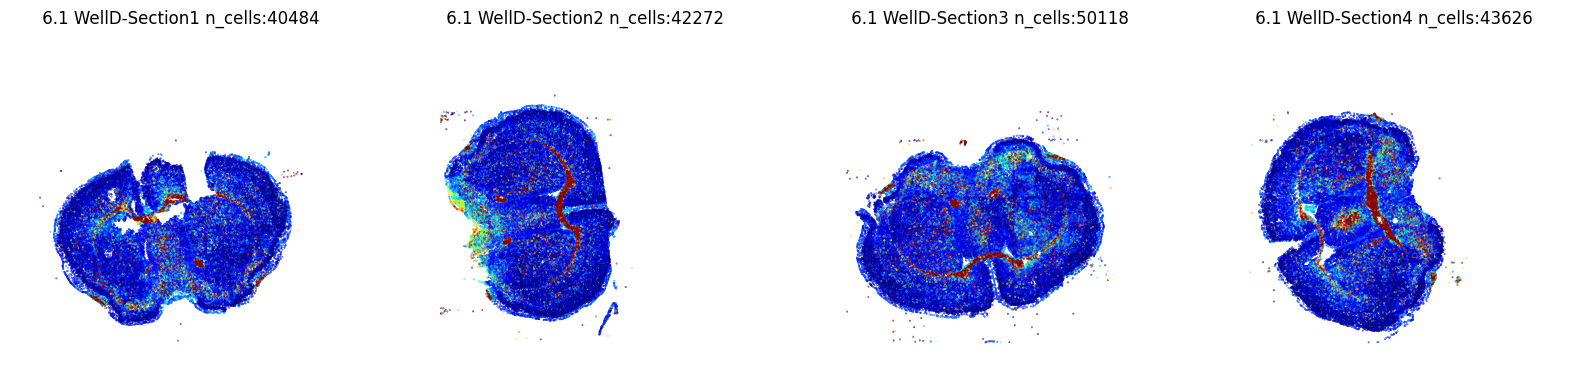

In [2]:
from dredFISH.Registration.Registration import *
dataset_path = '/orangedata/Images2024/Zach/MouseBrainAtlas/'
dataset = 'MMSM01_1.1.A_2.1.B_3.1.C_4.1.F_5.1.E_6.1.D_2024Apr15' #CHANGE
processing_name = 'Processing_2024Apr19' #CHANGE



sections = [i for i in os.listdir(os.path.join(dataset_path,dataset,processing_name)) if 'Section' in i]
data_dict = {}
for section in sections:
    data = fileu.load(path=os.path.join(dataset_path,dataset,processing_name,section),file_type='anndata')
    data_dict[section] = data

for section in sorted(list(data_dict.keys())):
    ccf_x = {}
    ccf_x[section] = ''
    print(ccf_x)

from dredFISH.Utils import basicu
bit = 'RS458122_cy5'

for well in sorted([i for i in dataset.split('_') if '.' in i]):
    fig,axs = plt.subplots(1,4,figsize=[20,7])
    # fig.suptitle(f"Coverslip {well.split('.'+well.split('.')[-1])[0]}")
    axs = axs.ravel()
    i = 0
    for key in sorted(list(data_dict.keys())):
        if f"Well{well.split('.')[-1]}" in key:
            data = data_dict[key]
            # print(well,key)
            ax = axs[i]
            ax.set_title(f" {well.split('.'+well.split('.')[-1])[0]} {key} n_cells:{str(data.shape[0])}")
            ax.axis('off')
            i+=1
            if not isinstance(data,type(None)):
                X = data.layers['processed_vectors'].copy()
                X = np.log10(np.clip(X,1,None))
                X = basicu.normalize_fishdata_robust_regression(X)
                c = X[:,data.var.index==bit]
                vmin,vmax = np.percentile(c,[5,95])
                c = np.clip(c,vmin,vmax)
                ax.scatter(data.obs['stage_x'],data.obs['stage_y'],c=c,s=0.1,cmap='jet')
                ax.set_xlim([0,13000])
                ax.set_ylim([0,13000])
                ax.set_aspect('equal')
    while i<4:
        ax = axs[i]
        ax.axis('off')
        i+=1
    plt.show()